<a href="https://colab.research.google.com/github/Mark-med/CHM/blob/main/lb11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Медведчук Марк 13 варіант лаба 11

Наближення прямою. Реалізація метода вручну

x= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y= [4.97502083 4.90033289 4.77668245 4.60530497 4.38791281 4.12667807
 3.82421094 3.48353355 3.10804984 2.70151153]
a0 = 5.49, a1 = -2.55


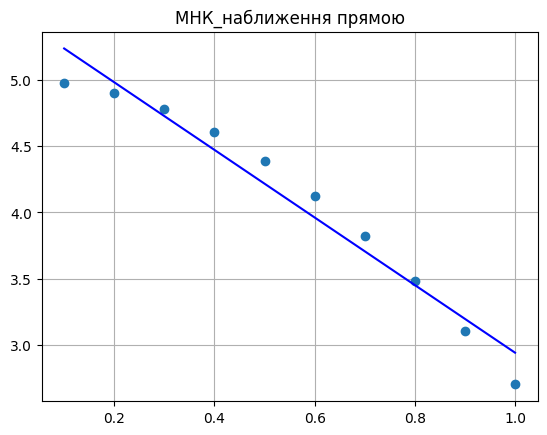

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
def func(x):
    return 5 * np.cos(x)
x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])
print('x=', x)
print('y=', y)
def fun(a, x, y):
    return a[0] + a[1] * x - y
a0 = np.array([1, 1])
res_lsq = least_squares(fun, x0=a0, args=(x, y))
print("a0 = %.2f, a1 = %.2f" % tuple(res_lsq.x))
f = lambda x: res_lsq.x[0] + res_lsq.x[1] * x
x_p = np.linspace(min(x), max(x), 20)
y_p = f(x_p)
plt.plot(x, y, 'o')
plt.plot(x_p, y_p, 'b')
plt.title("МНК_наближення прямою")
plt.grid(True)
plt.show()

Реалізація МНК наближення прямою за допомогою polyfit()

x= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y= [4.97502083 4.90033289 4.77668245 4.60530497 4.38791281 4.12667807
 3.82421094 3.48353355 3.10804984 2.70151153]
Рівняння лінії: y = -2.55x + 5.49


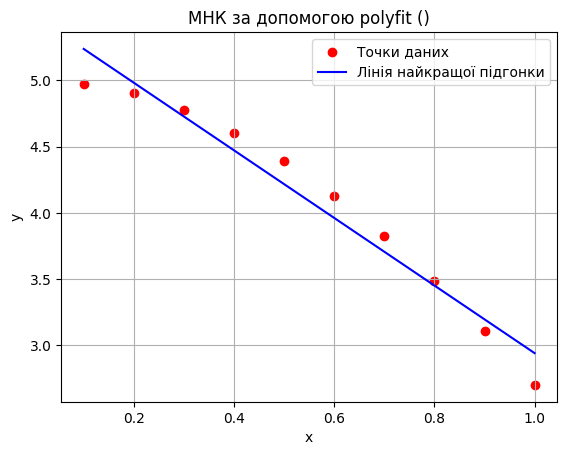

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])

print('x=', x)
print('y=', y)

# Використання polyfit для знаходження коефіцієнтів лінії (1 - це ступінь полінома, тобто лінія)
coefficients = np.polyfit(x, y, 1)

# Виведення результатів
a, b = coefficients
print(f"Рівняння лінії: y = {a:.2f}x + {b:.2f}")

# Створення поліноміальної функції для отриманих коефіцієнтів
polynomial = np.poly1d(coefficients)

# Побудова графіка
plt.scatter(x, y, color='red', label='Точки даних')
x_line = np.linspace(min(x), max(x), 100)  # Точки для побудови гладкої лінії
plt.plot(x_line, polynomial(x_line), color='blue', label='Лінія найкращої підгонки')

plt.title('МНК за допомогою polyfit ()')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Реалізація МНК наближення параболою за допомогою polyfit()

x= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y= [4.97502083 4.90033289 4.77668245 4.60530497 4.38791281 4.12667807
 3.82421094 3.48353355 3.10804984 2.70151153]
Рівняння параболи: y = -2.10x^2 + -0.25x + 5.03


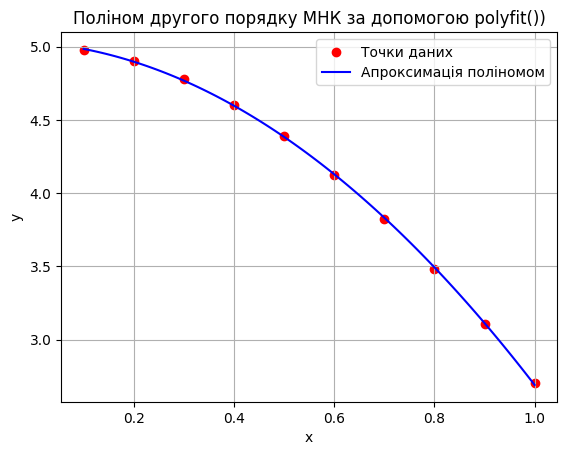

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])

print('x=', x)
print('y=', y)

# Використання polyfit для знаходження коефіцієнтів полінома другого порядку (ступінь 2)
coefficients = np.polyfit(x, y, 2)

# Виведення результатів
a, b, c = coefficients  # Тепер три коефіцієнти: для x^2, x та вільного члена
print(f"Рівняння параболи: y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}")

# Створення поліноміальної функції для отриманих коефіцієнтів
polynomial = np.poly1d(coefficients)

# Побудова графіка
plt.scatter(x, y, color='red', label='Точки даних')
x_line = np.linspace(min(x), max(x), 100)
plt.plot(x_line, polynomial(x_line), color='blue', label='Апроксимація поліномом')

plt.title('Поліном другого порядку МНК за допомогою polyfit())')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Наближення параболою за допомогою least_squares ()

x= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y= [4.97502083 4.90033289 4.77668245 4.60530497 4.38791281 4.12667807
 3.82421094 3.48353355 3.10804984 2.70151153]
a0 = 5.03, a1 = -0.25, a2 = -2.10


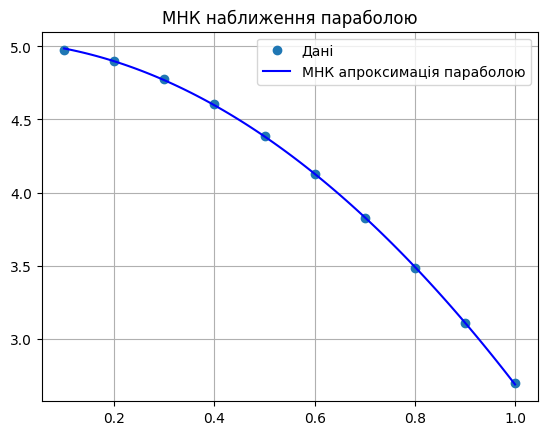

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares


def func(x):
    return 5 * np.cos(x)

# Вхідні дані
x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])  # Оцінюємо значення функції func для кожного x

print('x=', x)
print('y=', y)

# Функція для мінімізації
def fun(a, x, y):
    return a[0] + a[1] * x + a[2] * x**2 - y

# Початкові наближення коефіцієнтів полінома
a0 = np.array([1, 1, 1])

# Використовуємо least_squares для знаходження оптимальних параметрів
res_lsq = least_squares(fun, x0=a0, args=(x, y))

# Виведення коефіцієнтів поліному
print("a0 = %.2f, a1 = %.2f, a2 = %.2f" % tuple(res_lsq.x))

# Функція апроксимації з отриманими коефіцієнтами
def f(x):
    return res_lsq.x[0] + res_lsq.x[1] * x + res_lsq.x[2] * x**2

# Побудова графіка
x_p = np.linspace(min(x), max(x), 100)  # Точки для графіка апроксимованої функції
y_p = f(x_p)

# Графік
plt.plot(x, y, 'o', label='Дані')
plt.plot(x_p, y_p, 'b', label='МНК апроксимація параболою')
plt.title("МНК наближення параболою")
plt.legend()
plt.grid(True)
plt.show()